In [8]:
import xarray as xa
import matplotlib.pyplot as plt
import os
%pip install metpy
import metpy.calc
import metpy.plots
from metpy.units import units
import numpy as np

# ignora avisos
import warnings
warnings.filterwarnings("ignore")

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part 1

## Chuva

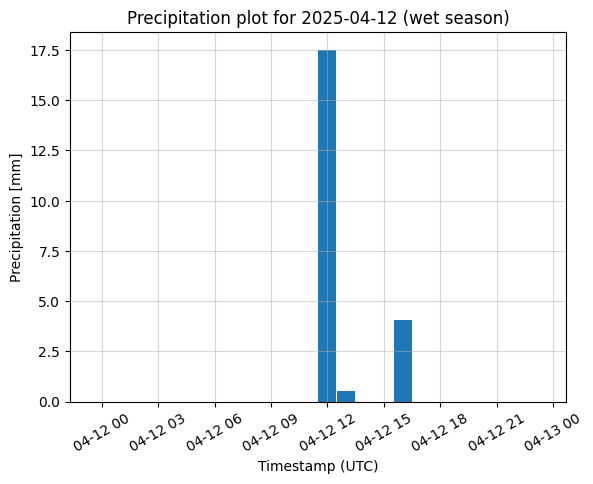

Precipitacao total 2025-04-12:  22.098


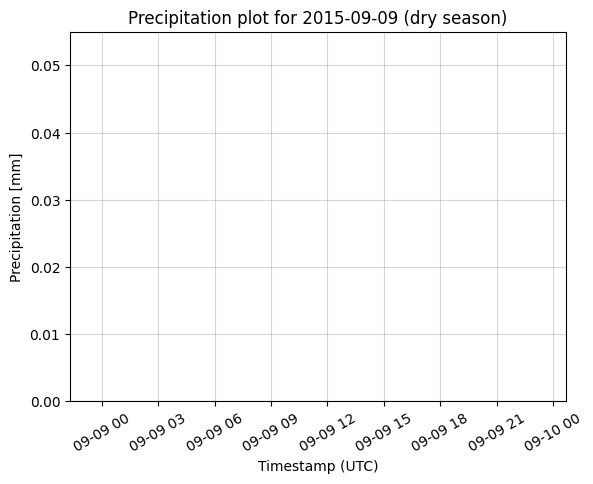

Precipitacao total 2015-09-09:  0.0


In [9]:
prec_paths = ['/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/pereiraa1/246627-rain/maoraintbS10.b1.20150412.000000.cdf',
               '/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/pereiraa1/246627-rain/maoraintbS10.b1.20150909.000000.cdf']


for path in prec_paths:
    if "20150412" in path:
        date = "2025-04-12"
        season = "wet"
    else:
        date = "2015-09-09"
        season = "dry"

    rain_wet = xa.open_dataset(path)
    rain_wet_mm = rain_wet['precip_tbrg'].resample(time='1H').sum()
    prec_wet = rain_wet_mm.values
    time_prec_wet = rain_wet_mm['time'].values


    fig, ax1 = plt.subplots()
    ax1.set_ylabel('Precipitation [mm]')
    ax1.set_xlabel('Timestamp (UTC)')
    #ax1.plot(time, prec)
    ax1.bar(x=time_prec_wet, height=prec_wet, width=0.04)
    # Grid visibility
    ax1.grid(alpha=0.5)

    ylim_min, ylim_max = plt.ylim()
    plt.ylim(0, ylim_max)
    plt.xticks(rotation=30)
    plt.title(f"Precipitation plot for {date} ({season} season)")
    plt.gca()
    plt.show()
    print(f"Precipitacao total {date}: ", np.sum(prec_wet))


## Precipitable Water

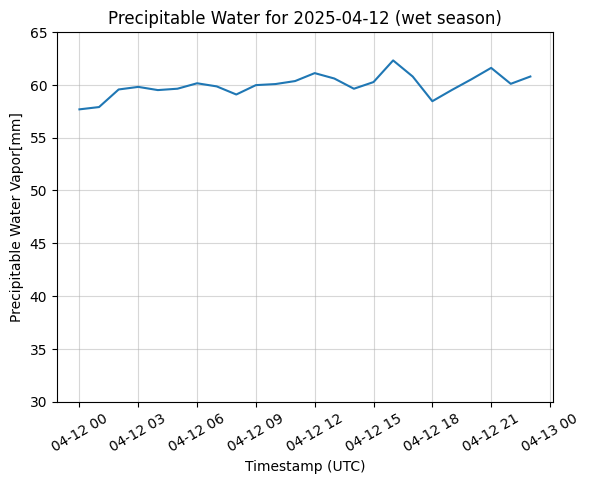

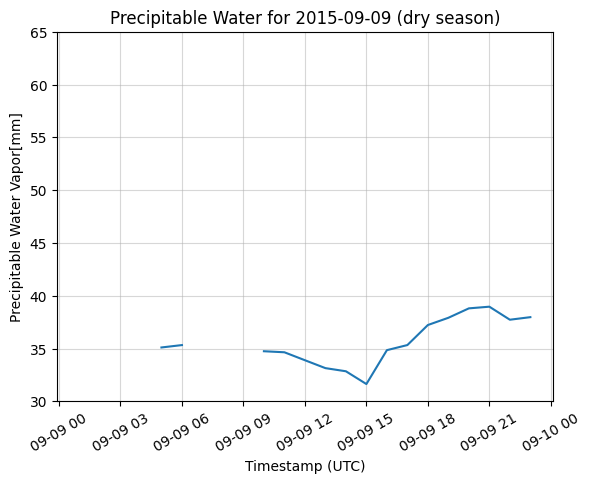

In [10]:
precipitable_water_paths = ['/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/pereiraa1/246626-microwave-radiometer/maomwrret1liljclouM1.s2.20150412.000000.custom.cdf',
                            '/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/pereiraa1/246626-microwave-radiometer/maomwrret1liljclouM1.s2.20150909.000008.custom.cdf']
for path in precipitable_water_paths:
    if "20150412" in path:
        date = "2025-04-12"
        season = "wet"
    else:
        date = "2015-09-09"
        season = "dry"

    precipitable_water = xa.open_dataset(path)
    precipitable_water_pwv = precipitable_water['be_pwv']
    precipitable_water_pwv*=10
    precipitable_water_pwv.attrs['units'] = 'mm'

    prec_water = precipitable_water_pwv.resample(time='1H').mean()
    prec_water_values = prec_water.values
    time_prec_water = prec_water['time'].values


    fig, ax1 = plt.subplots()
    ax1.set_ylabel('Precipitable Water Vapor[mm]')
    ax1.set_xlabel('Timestamp (UTC)')
    ax1.plot(time_prec_water, prec_water_values)
    # Grid visibility
    ax1.grid(alpha=0.5)

    plt.ylim(30, 65)
    plt.xticks(rotation=30)
    plt.title(f"Precipitable Water for {date} ({season} season)")
    plt.gca()
    plt.show()

## Radiação de Onda Curta e Longa

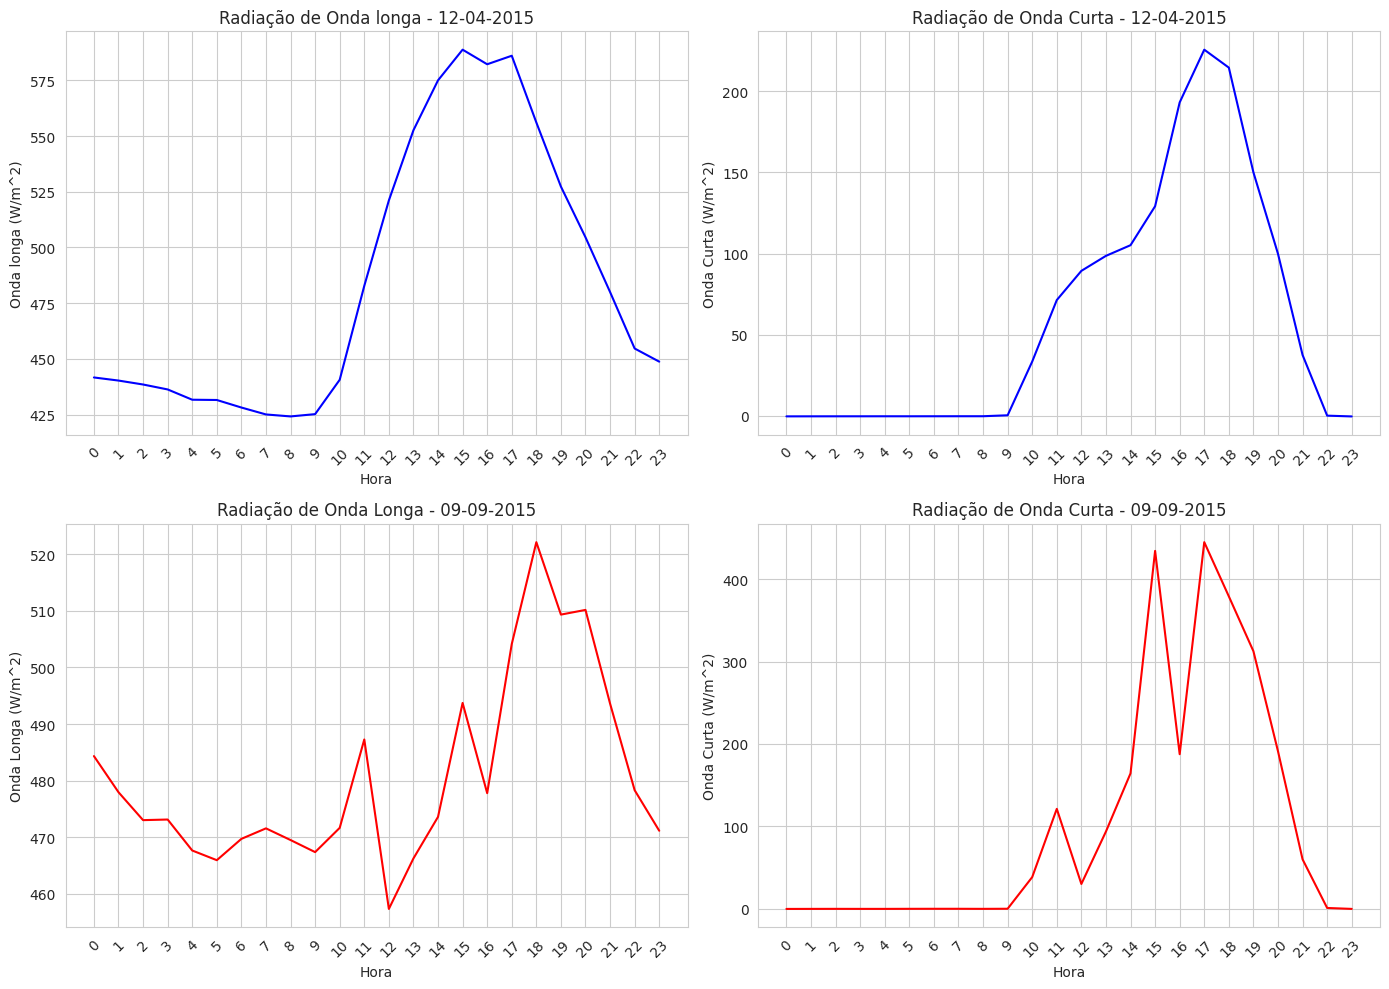

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados para o dia 09
dia_09_rad = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/rad/maoqcrad1longM1.c1.20150412.000000.custom.csv')
dia_09_rad['data'] = pd.to_datetime(dia_09_rad['time'])
dia_09_rad['hora'] = dia_09_rad['data'].dt.hour

# Carregar os dados para o dia 12
dia_12_rad = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/rad/maoqcrad1longM1.c1.20150909.000000.custom.csv')
dia_12_rad['data'] = pd.to_datetime(dia_12_rad['time'])
dia_12_rad['hora'] = dia_12_rad['data'].dt.hour

data_do_dia_12 = '12-04-2015'
data_do_dia_09 = '09-09-2015'

sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot para o dia 12 - Subplot 1
sns.lineplot(x='hora', y='up_long_hemisp', data=dia_12_rad, color='b', ci=None, ax=axes[0, 0])
axes[0, 0].set_xlabel('Hora')
axes[0, 0].set_ylabel('Onda longa (W/m^2)')
axes[0, 0].set_title(f'Radiação de Onda longa - {data_do_dia_12}')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_xticks(range(0, 24, 1))

# Plot para o dia 09 - Subplot 2
sns.lineplot(x='hora', y='down_short_diffuse_hemisp', data=dia_12_rad, color='b', ci=None, ax=axes[0, 1])
axes[0, 1].set_xlabel('Hora')
axes[0, 1].set_ylabel('Onda Curta (W/m^2)')
axes[0, 1].set_title(f'Radiação de Onda Curta - {data_do_dia_12}')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_xticks(range(0, 24, 1))

# Plot para o dia 12 - Subplot 3
sns.lineplot(x='hora', y='up_long_hemisp', data=dia_09_rad, color='r', ci=None, ax=axes[1, 0])
axes[1, 0].set_xlabel('Hora')
axes[1, 0].set_ylabel('Onda Longa (W/m^2)')
axes[1, 0].set_title(f'Radiação de Onda Longa - {data_do_dia_09}')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_xticks(range(0, 24, 1))

# Plot para o dia 09 - Subplot 4
sns.lineplot(x='hora', y='down_short_diffuse_hemisp', data=dia_09_rad, color='r', ci=None, ax=axes[1, 1])
axes[1, 1].set_xlabel('Hora')
axes[1, 1].set_ylabel('Onda Curta (W/m^2)')
axes[1, 1].set_title(f'Radiação de Onda Curta - {data_do_dia_09}')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_xticks(range(0, 24, 1))

plt.tight_layout()
plt.show()


## Calor Sensivel e Latente

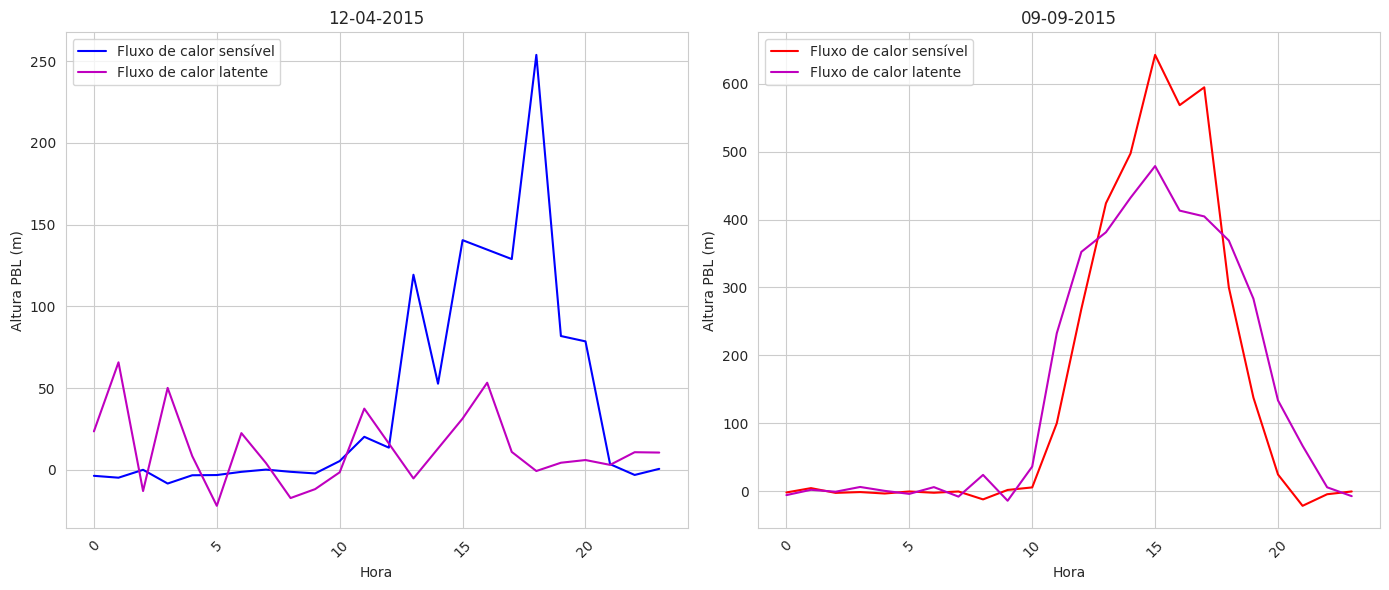

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from metpy.plots import SkewT
from datetime import datetime
import math
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

dia_12 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/sens. heat/mao30qcecorM1.s1.20150412.000000.custom.csv")
dia_12['data'] = pd.to_datetime(dia_12['time'])
dia_12['hora'] = dia_12['data'].dt.hour

dia_09 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/sens. heat/mao30qcecorM1.s1.20150909.000000.custom.csv")
dia_09['data'] = pd.to_datetime(dia_09['time'])
dia_09['hora'] = dia_09['data'].dt.hour


data_do_dia_12 = '12-04-2015'
data_do_dia_09 = '09-09-2015'

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot para o dia 12
sns.lineplot(x='hora', y='sensible_heat_flux', data=dia_12, color='b', estimator=sum, ci=None, ax=axes[0])
sns.lineplot(x='hora', y='latent_heat_flux', data=dia_12, color='m', estimator=sum, ci=None, ax=axes[0])

axes[0].legend(['Fluxo de calor sensível', 'Fluxo de calor latente'])
axes[0].set_xlabel('Hora')
axes[0].set_ylabel('Altura PBL (m)')
axes[0].set_title(f'{data_do_dia_12}')
axes[0].tick_params(axis='x', rotation=45)
#axes[0].set_ylim(0, 20)

# Plot para o dia 09
sns.lineplot(x='hora', y='sensible_heat_flux', data=dia_09, color='r', estimator=sum, ci=None, ax=axes[1])
sns.lineplot(x='hora', y='latent_heat_flux', data=dia_09, color='m', estimator=sum, ci=None, ax=axes[1])

axes[1].legend(['Fluxo de calor sensível', 'Fluxo de calor latente'])
axes[1].set_xlabel('Hora')
axes[1].set_ylabel('Altura PBL (m)')
axes[1].set_title(f'{data_do_dia_09}')
axes[1].tick_params(axis='x', rotation=45)
#axes[1].set_ylim(0, 20)


plt.tight_layout()
plt.show()


## PBL

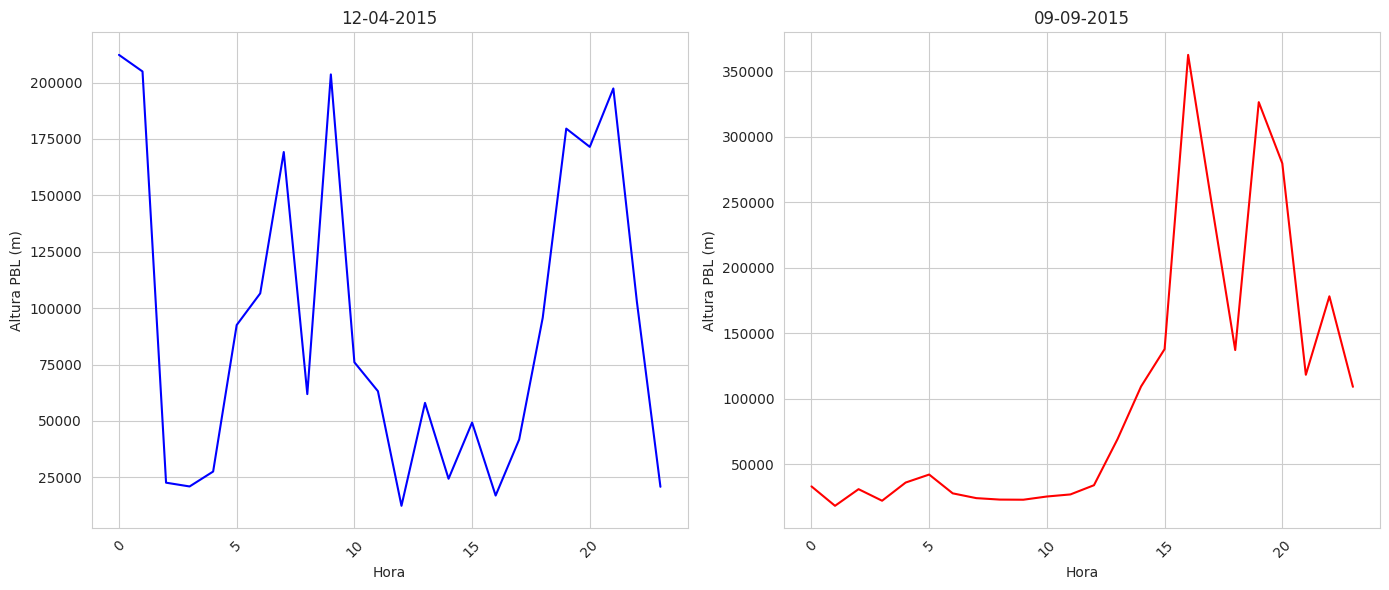

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from metpy.plots import SkewT
from datetime import datetime
import math
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

dia_12 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/pereiraa1/246920-pbl/ascii-csv/maoceilpblhtM1.a0.20150412.000000.custom.csv")
dia_12['data'] = pd.to_datetime(dia_12['time'])
dia_12['hora'] = dia_12['data'].dt.hour

dia_09 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/pereiraa1/246920-pbl/ascii-csv/maoceilpblhtM1.a0.20150909.000000.custom.csv")
dia_09['data'] = pd.to_datetime(dia_09['time'])
dia_09['hora'] = dia_09['data'].dt.hour


data_do_dia_12 = '12-04-2015'
data_do_dia_09 = '09-09-2015'

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot para o dia 12
sns.lineplot(x='hora', y='bl_height_1', data=dia_12, color='b', estimator=sum, ci=None, ax=axes[0])
axes[0].set_xlabel('Hora')
axes[0].set_ylabel('Altura PBL (m)')
axes[0].set_title(f'{data_do_dia_12}')
axes[0].tick_params(axis='x', rotation=45)
#axes[0].set_ylim(0, 20)

# Plot para o dia 09
sns.lineplot(x='hora', y='bl_height_1', data=dia_09, color='r', estimator=sum, ci=None, ax=axes[1])
axes[1].set_xlabel('Hora')
axes[1].set_ylabel('Altura PBL (m)')
axes[1].set_title(f'{data_do_dia_09}')
axes[1].tick_params(axis='x', rotation=45)
#axes[1].set_ylim(0, 20)


plt.tight_layout()
plt.show()


# Part 2

## Temperatura, umidade e ponto de orvalho

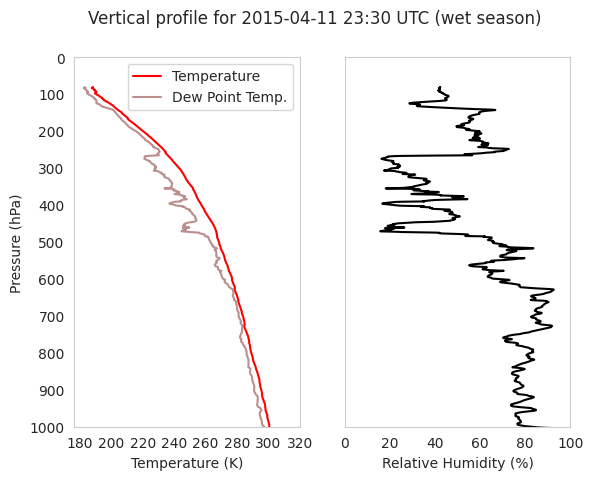

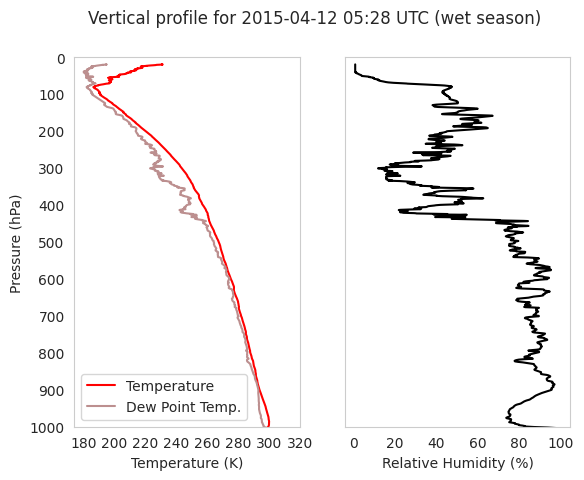

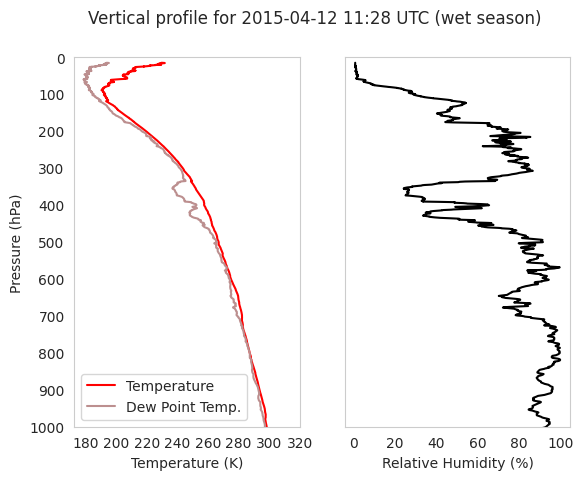

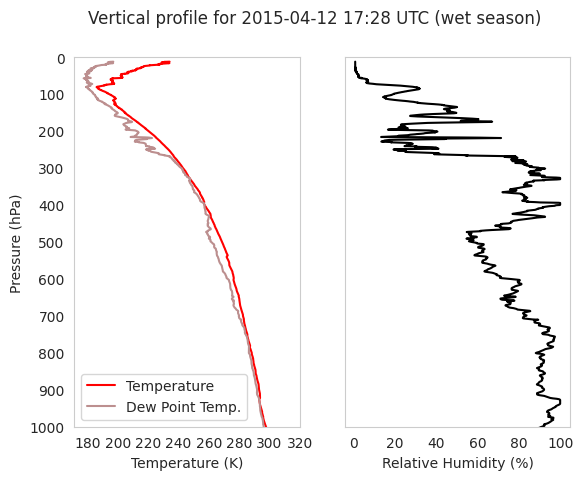

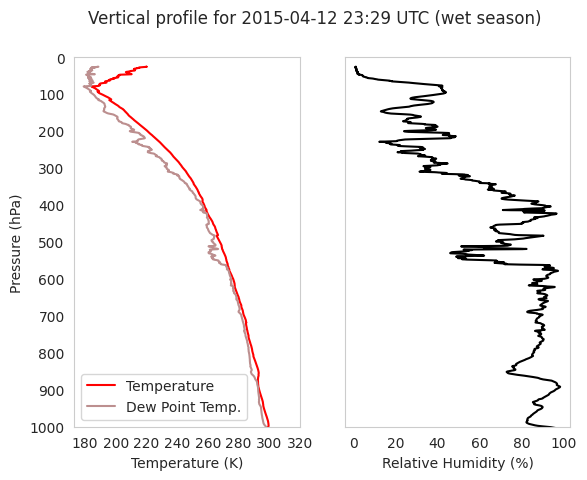

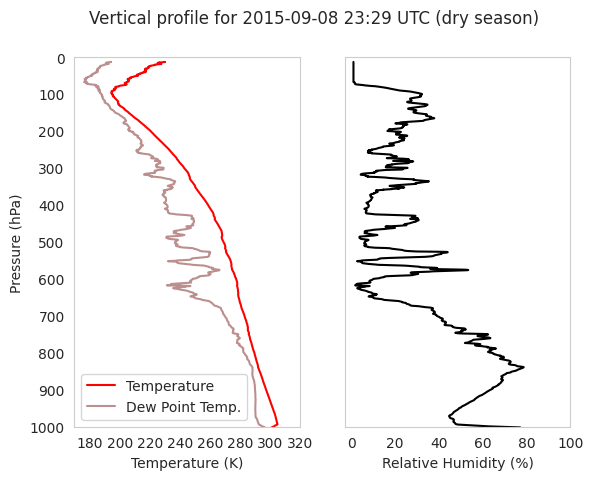

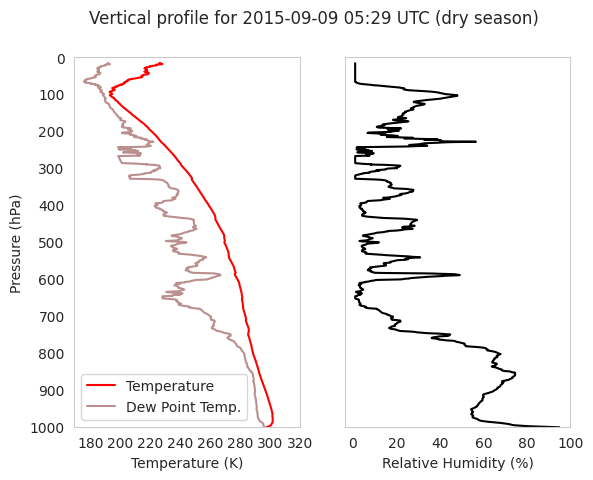

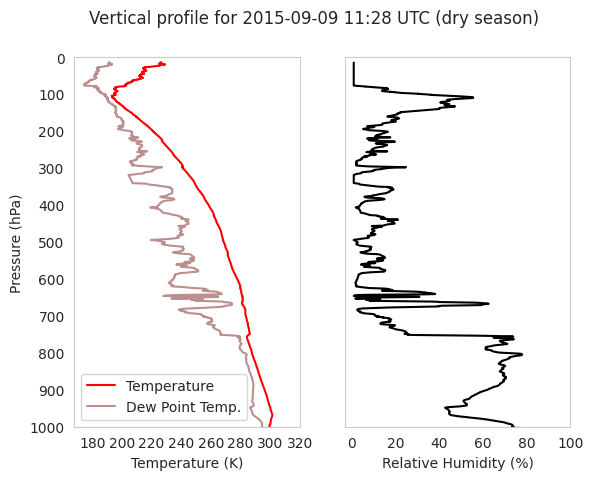

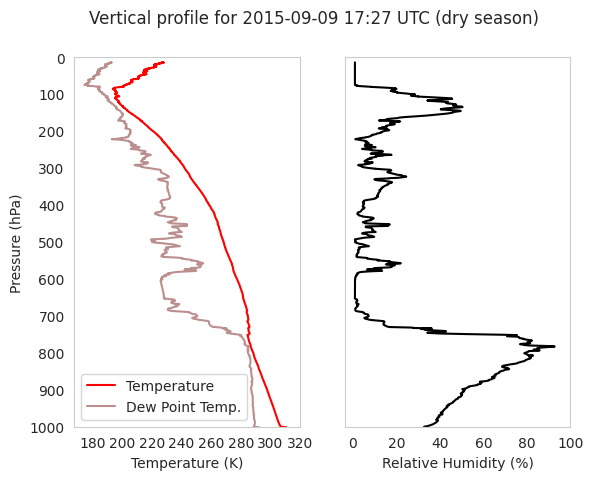

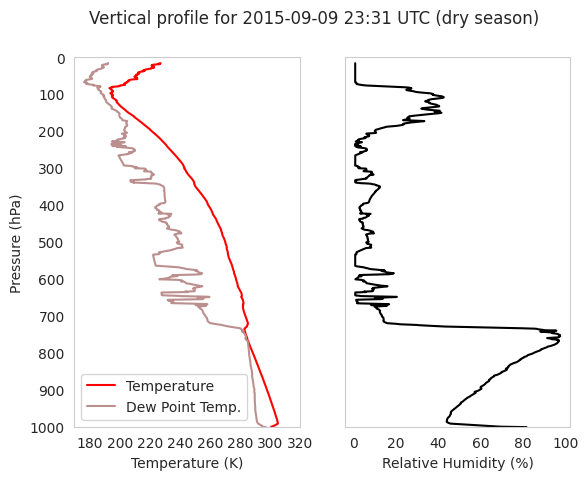

In [16]:
files = [file for file in os.listdir('/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/pereiraa1/246615-rs') if file.startswith('maosondewnpn')]
for file in files:
    if "20150412" in file or "20150411" in file:
        date = "2025-04-12"
        season = "wet"
    else:
        date = "2015-09-09"
        season = "dry"
    date = file.split('.')[2]
    date = f"{date[:4]}-{date[4:6]}-{date[6:]}"
    hour = file.split('.')[3]
    hour = f"{hour[:2]}:{hour[2:4]}"
    file_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/pereiraa1/246615-rs', file)
    rs_wet = xa.open_dataset(file_path)
    rs_wet_temp, rs_wet_rh, rs_wet_dew = rs_wet['tdry'], rs_wet['rh'], rs_wet['dp']

    pressure = list(rs_wet['pres'].values)
    temp_wet = list((rs_wet_temp+273.15).values)
    rh_wet = list(rs_wet_rh.values)
    dew_wet = list((rs_wet_dew+273.15).values)

    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.set_ylabel('Pressure (hPa)')
    ax1.plot(temp_wet, pressure, color='red')
    ax1.plot(dew_wet, pressure, color='rosybrown')
    ax1.legend(['Temperature', 'Dew Point Temp.'])
    ax1.set_xticks(np.arange(180, 321, 20))
    ax1.set_yticks(np.arange(0, 1000+1, 100))
    ax1.set_xlabel('Temperature (K)')
    ax1.grid()
    ax1.set_ylim(100)

    ax2.plot(rh_wet, pressure, color='black')
    ax2.set_xlabel('Relative Humidity (%)')
    ax2.set_xticks(range(0, 101, 20))
    ax1.set_yticks(np.arange(0, 1000+1, 100))
    ax2.grid()
    plt.suptitle(f"Vertical profile for {date} {hour} UTC ({season} season)")
    plt.gca().invert_yaxis()
    plt.ylim(1000, 0)
    plt.show()

## Temperatura Potencial, Temperatura Potencial Equivalente e Temperatura Potencial Equivalente Saturada

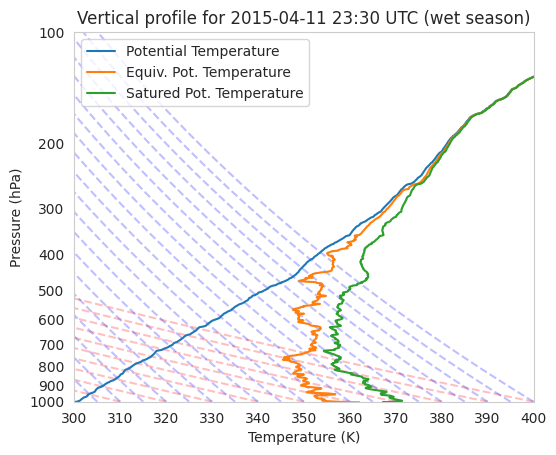

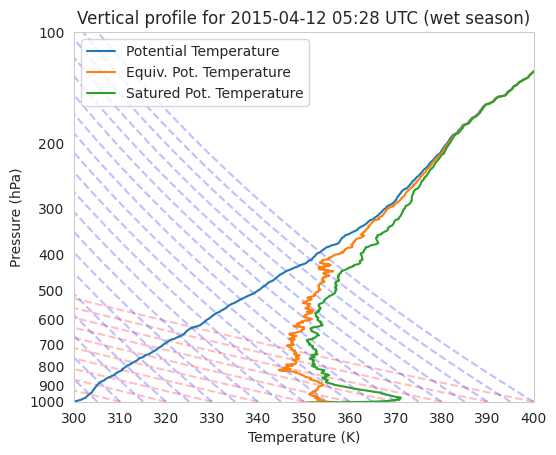

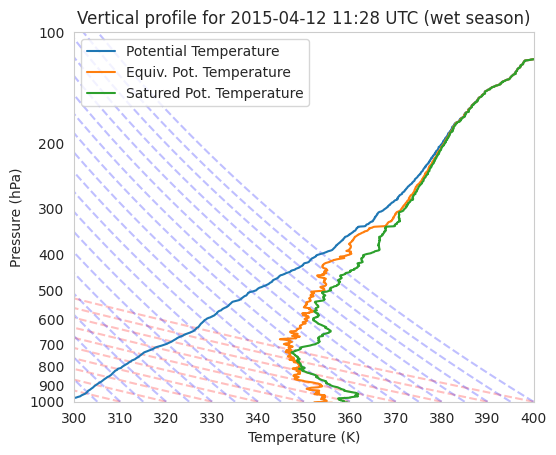

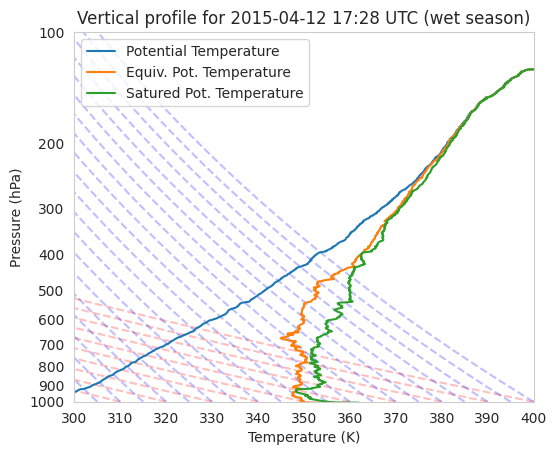

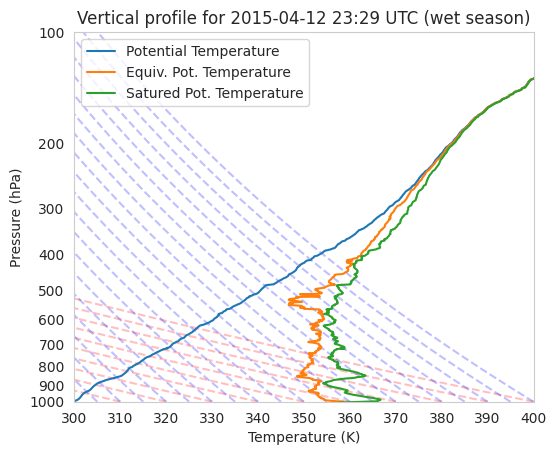

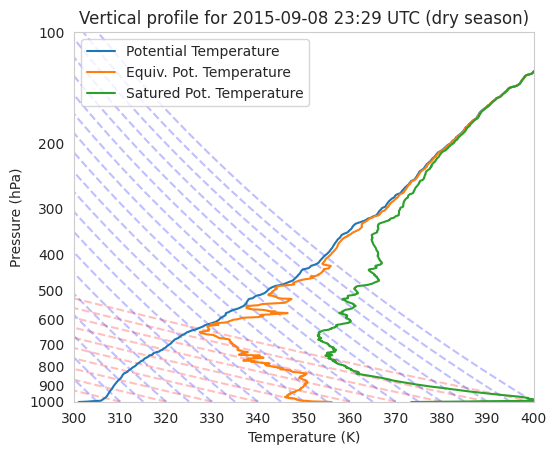

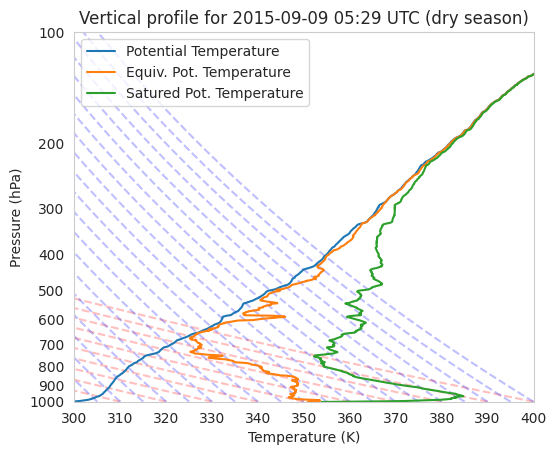

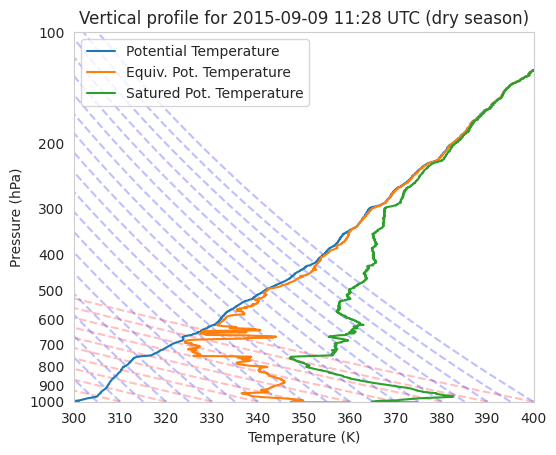

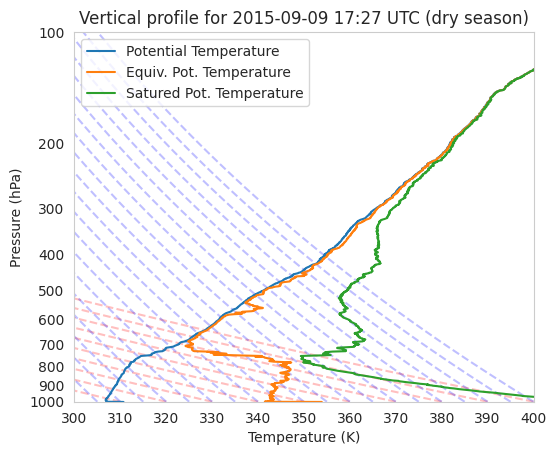

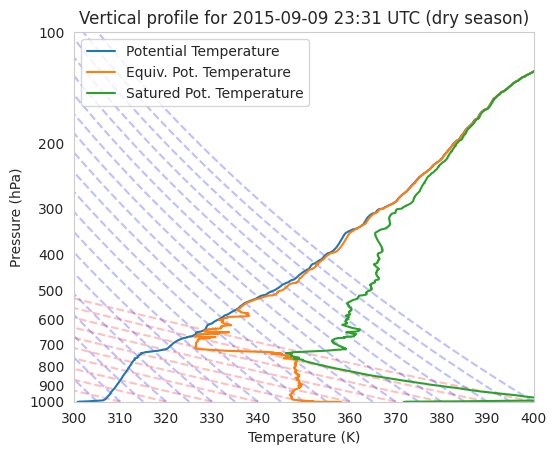

In [17]:
files = [file for file in os.listdir('/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/pereiraa1/246615-rs') if file.startswith('maosondewnpn')]
for file in files:
    if "20150412" in file or "20150411" in file:
        date = "2025-04-12"
        season = "wet"
    else:
        date = "2015-09-09"
        season = "dry"
    date = file.split('.')[2]
    date = f"{date[:4]}-{date[4:6]}-{date[6:]}"
    hour = file.split('.')[3]
    hour = f"{hour[:2]}:{hour[2:4]}"
    file_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/pereiraa1/246615-rs', file)
    rs = xa.open_dataset(file_path)
    rs_temp, rs_dew = rs['tdry'], rs['dp']

    rs_temp_kelvin = rs_temp + 273.15
    rs_temp_kelvin.attrs['units'] = 'K'

    rs_dp_kelvin = rs_dew + 273.15
    rs_dp_kelvin.attrs['units'] = 'K'

    potential_temperature = metpy.calc.potential_temperature(pressure=rs['pres'], temperature=rs_temp_kelvin)
    equiv_pot_temp = metpy.calc.equivalent_potential_temperature(pressure=rs['pres'], temperature=rs_temp_kelvin, dewpoint=rs_dp_kelvin)
    sat_pot_temp = metpy.calc.saturation_equivalent_potential_temperature(pressure=rs['pres'], temperature=rs_temp_kelvin)

    # fig, ax1 = plt.subplots()
    # ax1.set_ylabel('Pressure (hPa)')
    # ax1.plot(potential_temperature, rs['pres'])
    # ax1.plot(equiv_pot_temp, rs['pres'])
    # ax1.plot(sat_pot_temp, rs['pres'])
    # ax1.legend(['Potential Temperature', 'Equiv. Pot. Temperature', 'Sat. Pot. Temperature'])
    # ax1.set_xlabel('Temperature (K)')
    # ax1.grid()
    # plt.gca().invert_yaxis()
    # plt.ylim(1000, 0)

    fig = plt.figure()
    skew = metpy.plots.SkewT(fig)
    skew.ax.set_ylabel('Pressure (hPa)')
    skew.ax.set_xlim(300, 400)
    skew.ax.set_ylim(1000, 100)
    skew.plot_dry_adiabats(alpha=0.25, color='orangered')
    skew.plot_moist_adiabats(alpha=0.25, color='tab:green')
    skew.plot_mixing_lines(linestyle='dotted', color='tab:blue')
    skew.plot(rs['pres'], potential_temperature, label="Potential Temperature")
    skew.plot(rs['pres'], equiv_pot_temp, label="Equiv. Pot. Temperature")
    skew.plot(rs['pres'], sat_pot_temp, label="Satured Pot. Temperature")
    skew.ax.legend()
    skew.ax.set_xlabel('Temperature (K)')
    skew.ax.grid()

    plt.title(f"Vertical profile for {date} {hour} UTC ({season} season)")

    plt.show()

## Dry Static Energy, Moist Static Energy e h* (saturada)

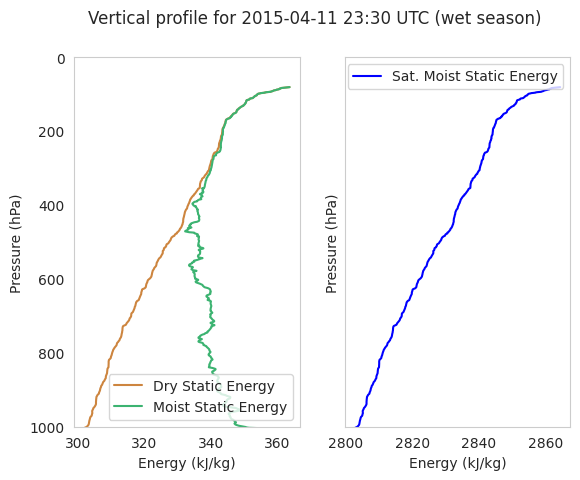

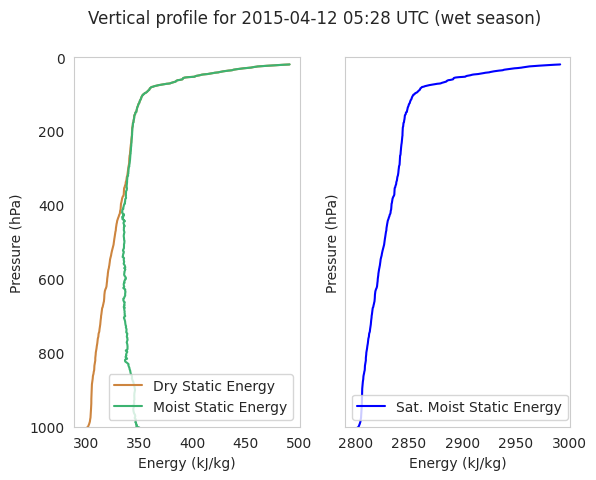

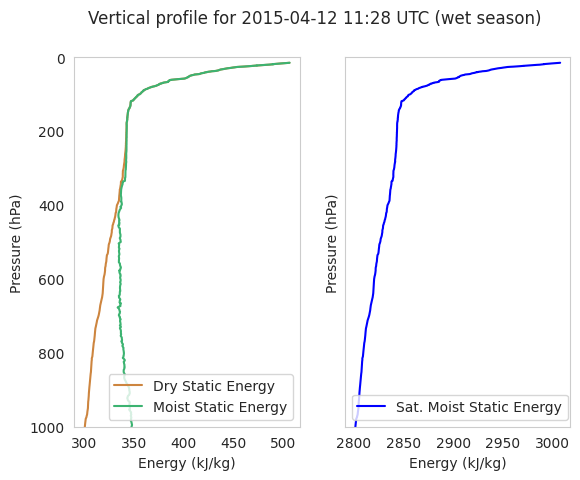

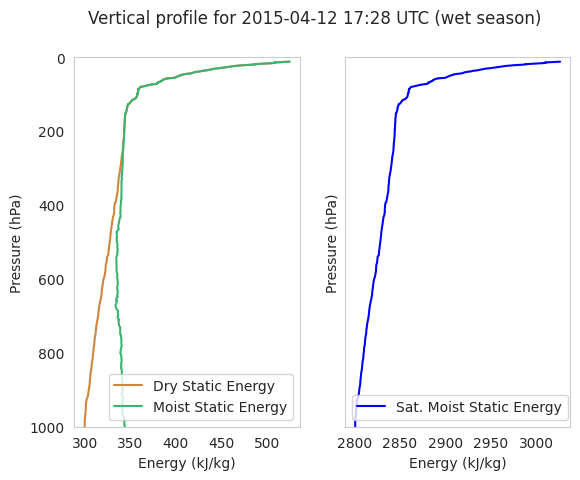

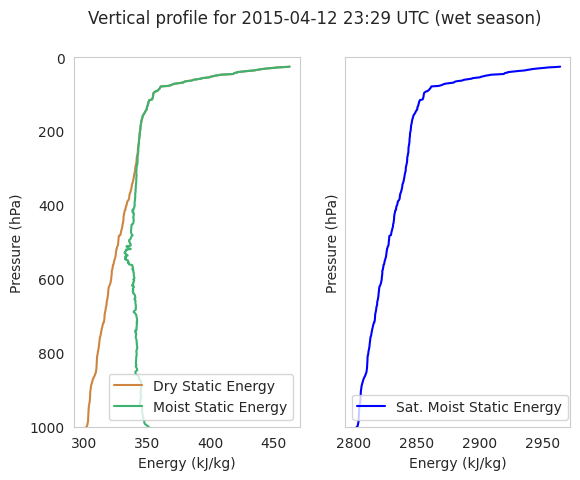

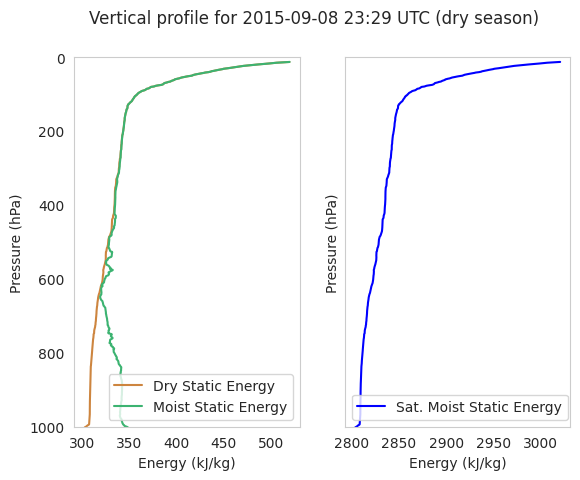

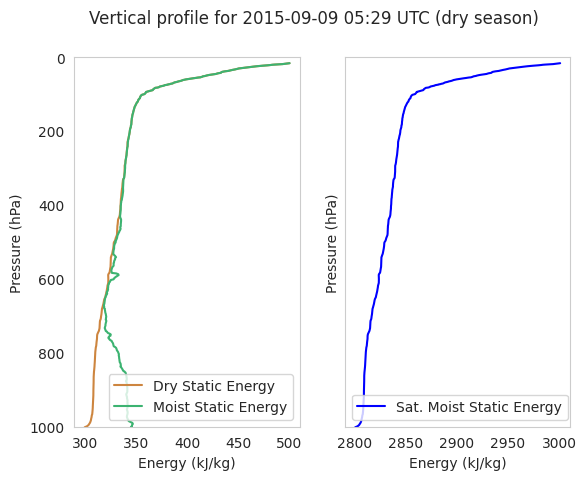

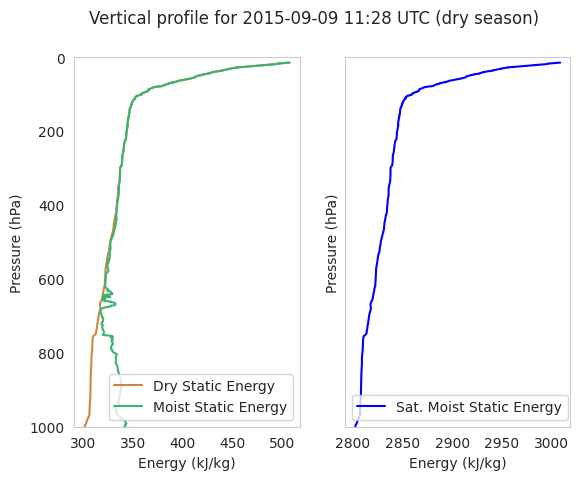

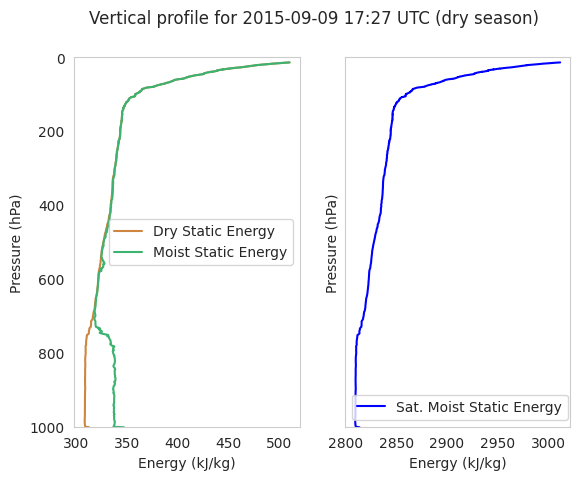

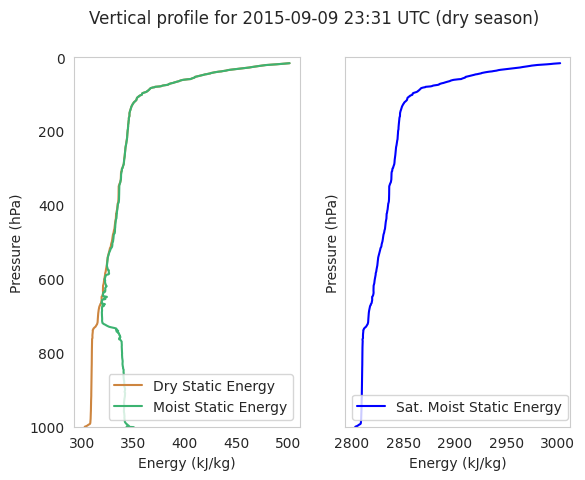

In [18]:
files = [file for file in os.listdir('/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/pereiraa1/246615-rs') if file.startswith('maosondewnpn')]
for file in files:
    if "20150412" in file or "20150411" in file:
        season = "wet"
    else:
        season = "dry"
    date = file.split('.')[2]
    date = f"{date[:4]}-{date[4:6]}-{date[6:]}"
    hour = file.split('.')[3]
    hour = f"{hour[:2]}:{hour[2:4]}"
    file_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/pereiraa1/246615-rs', file)
    rs = xa.open_dataset(file_path)
    rs_temp, rs_dew = rs['tdry'], rs['dp']

    rs_temp_kelvin = rs_temp + 273.15
    rs_temp_kelvin.attrs['units'] = 'K'

    rs_dp_kelvin = rs_dew + 273.15
    rs_dp_kelvin.attrs['units'] = 'K'

    dse = metpy.calc.dry_static_energy(height=rs['alt'], temperature=rs_temp_kelvin)
    sh = metpy.calc.specific_humidity_from_dewpoint(pressure=rs['pres'], dewpoint=rs_dp_kelvin)
    mse = metpy.calc.moist_static_energy(height=rs['alt'], temperature=rs_temp_kelvin, specific_humidity=sh)
    smse = metpy.calc.moist_static_energy(height=rs['alt'], temperature=rs_temp_kelvin, specific_humidity=xa.ones_like(sh))

    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.set_ylabel('Pressure (hPa)')
    ax1.plot(dse, rs['pres'], color='peru', label='Dry Static Energy')
    ax1.plot(mse, rs['pres'], color='mediumseagreen', label='Moist Static Energy')
    ax1.set_xlabel('Energy (kJ/kg)')
    ax1.grid()
    ax1.legend()

    ax2.set_ylabel('Pressure (hPa)')
    ax2.plot(smse, rs['pres'], color='blue', label='Sat. Moist Static Energy')
    ax2.set_xlabel('Energy (kJ/kg)')
    ax2.grid()
    ax2.legend()

    plt.suptitle(f"Vertical profile for {date} {hour} UTC ({season} season)")
    plt.gca().invert_yaxis()
    plt.ylim(1000, 0)
    plt.show()

    # Writing pressure level, dse, mse and smse in one file per date
    with open(f"{date}-{hour}_{season}_energys.txt", "w") as f:
        f.write("Pressure (hPa), Dry Static Energy (kJ/kg), Moist Static Energy (kJ/kg), Saturated Moist Static Energy (kJ/kg)\n")
        for i in range(len(rs['pres'])):
            f.write(f"{rs['pres'][i].values}, {dse[i].values}, {mse[i].values}, {smse[i].values}\n")

## Vento Zonal e Meridional

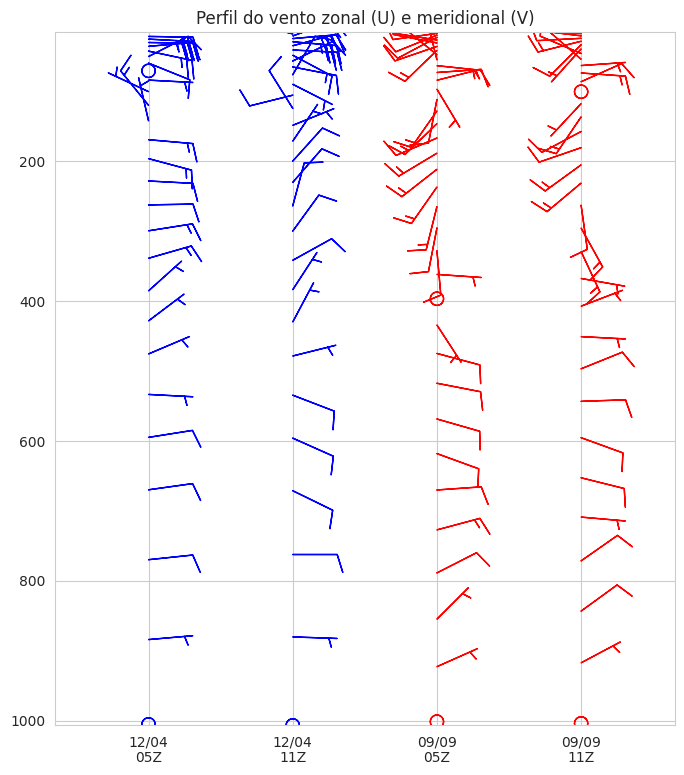

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/sound/maosondewnpnM1.b1.20150412.052800.custom.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/sound/maosondewnpnM1.b1.20150412.112800.custom.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/sound/maosondewnpnM1.b1.20150909.052900.custom.csv')
data4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/sound/maosondewnpnM1.b1.20150909.112800.custom.csv')

# Converter a coluna 'time' para datetime - primeiro arquivo
data1['Data_Hora'] = pd.to_datetime(data1['time'])
data2['Data_Hora'] = pd.to_datetime(data2['time'])
data3['Data_Hora'] = pd.to_datetime(data3['time'])
data4['Data_Hora'] = pd.to_datetime(data4['time'])

data1['Data'] = data1['Data_Hora'].dt.date
data1['Hora'] = data1['Data_Hora'].dt.time

data2['Data'] = data2['Data_Hora'].dt.date
data2['Hora'] = data2['Data_Hora'].dt.time

data3['Data'] = data3['Data_Hora'].dt.date
data3['Hora'] = data3['Data_Hora'].dt.time

data4['Data'] = data4['Data_Hora'].dt.date
data4['Hora'] = data4['Data_Hora'].dt.time

datetime_str1 = data1['Data'].astype(str) + ' ' + data1['Hora'].astype(str)
dt_obj1 = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in datetime_str1]
time1 = [d.strftime('%d/%m\n%HZ') if d.hour == 0 else d.strftime('%d/%m\n05Z') for d in dt_obj1] # Formatando os objetos datetime

datetime_str2 = data2['Data'].astype(str) + ' ' + data2['Hora'].astype(str)
dt_obj2 = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in datetime_str2]
time2 = [d.strftime('%d/%m\n%HZ') if d.hour == 0 else d.strftime('%d/%m\n11Z') for d in dt_obj2] # Formatando os objetos datetime

datetime_str3 = data3['Data'].astype(str) + ' ' + data3['Hora'].astype(str)
dt_obj3 = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in datetime_str3]
time3 = [d.strftime('%d/%m\n%HZ') if d.hour == 0 else d.strftime('%d/%m\n05Z') for d in dt_obj3] # Formatando os objetos datetime

datetime_str4 = data4['Data'].astype(str) + ' ' + data4['Hora'].astype(str)
dt_obj4 = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in datetime_str4]
time4 = [d.strftime('%d/%m\n%HZ') if d.hour == 0 else d.strftime('%d/%m\n11Z') for d in dt_obj4] # Formatando os objetos datetime


press1 = data1['pres']  # Press - primeiro arquivo
speeds1 = data1['wspd']  # Velocidade do vento em m/s - primeiro arquivo
directions1 = data1['deg']  # Direção do vento em graus - primeiro arquivo

press2 = data2['pres']  # Press - segundo arquivo
speeds2 = data2['wspd']  # Velocidade do vento em m/s - segundo arquivo
directions2 = data2['deg']  # Direção do vento em graus - segundo arquivo

press3 = data3['pres']  # Press - segundo arquivo
speeds3 = data3['wspd']  # Velocidade do vento em m/s - segundo arquivo
directions3 = data3['deg']  # Direção do vento em graus - segundo arquivo

press4 = data4['pres']  # Press - segundo arquivo
speeds4 = data4['wspd']  # Velocidade do vento em m/s - segundo arquivo
directions4 = data4['deg']  # Direção do vento em graus - segundo arquivo

radians1 = directions1 * np.pi / 180.  # Convertendo para radianos - primeiro arquivo
radians2 = directions2 * np.pi / 180.  # Convertendo para radianos - segundo arquivo
radians3 = directions3 * np.pi / 180.  # Convertendo para radianos - primeiro arquivo
radians4 = directions4 * np.pi / 180.  # Convertendo para radianos - segundo arquivo

# Calcular as componentes u e v da velocidade do vento - primeiro arquivo
u1 = -speeds1 * np.sin(radians1)
v1 = -speeds1 * np.cos(radians1)

u2 = -speeds2 * np.sin(radians2)
v2 = -speeds2 * np.cos(radians2)

u3 = -speeds3 * np.sin(radians3)
v3 = -speeds3 * np.cos(radians3)

u4 = -speeds4 * np.sin(radians4)
v4 = -speeds4 * np.cos(radians4)

# Criar um gráfico com barras de vento usando Matplotlib
fig, ax = plt.subplots(figsize=(8, 9))

# Step
step = 100
press_step1 = press1[::step]  # Coletando a cada passo - primeiro arquivo
u_step1 = u1[::step]  # Coletando a cada passo - primeiro arquivo
v_step1 = v1[::step]  # Coletando a cada passo - primeiro arquivo
time_step1 = time1[::step]  # Coletando a cada passo - primeiro arquivo

press_step2 = press2[::step]  # Coletando a cada passo - segundo arquivo
u_step2 = u2[::step]  # Coletando a cada passo - segundo arquivo
v_step2 = v2[::step]  # Coletando a cada passo - segundo arquivo
time_step2 = time2[::step]  # Coletando a cada passo - segundo arquivo

press_step3 = press3[::step]  # Coletando a cada passo - segundo arquivo
u_step3 = u3[::step]  # Coletando a cada passo - segundo arquivo
v_step3 = v3[::step]  # Coletando a cada passo - segundo arquivo
time_step3 = time3[::step]  # Coletando a cada passo - segundo arquivo

press_step4 = press4[::step]  # Coletando a cada passo - segundo arquivo
u_step4 = u4[::step]  # Coletando a cada passo - segundo arquivo
v_step4 = v4[::step]  # Coletando a cada passo - segundo arquivo
time_step4 = time4[::step]  # Coletando a cada passo - segundo arquivo

ax.barbs(time_step1, press_step1, u_step1, v_step1, length=8, linewidth=1, color='b', label='2015-04-12')
ax.barbs(time_step2, press_step2, u_step2, v_step2, length=8, linewidth=1, color='b', label='2015-04-12')
ax.barbs(time_step3, press_step3, u_step3, v_step3, length=8, linewidth=1, color='r', label='2015-09-09')
ax.barbs(time_step4, press_step4, u_step4, v_step4, length=8, linewidth=1, color='r', label='2015-09-09')


plt.gca().invert_yaxis()
plt.title("Perfil do vento zonal (U) e meridional (V)")
#plt.legend()

# Definindo os limites do eixo x e y para centralizá-lo
ax.set_xlim(ax.get_xlim()[0] - 0.5, ax.get_xlim()[1] + 0.5)
ax.set_ylim(ax.get_ylim()[0] - 50, ax.get_ylim()[1] + 50)

plt.show()


# Part 3

## Drop Distribution

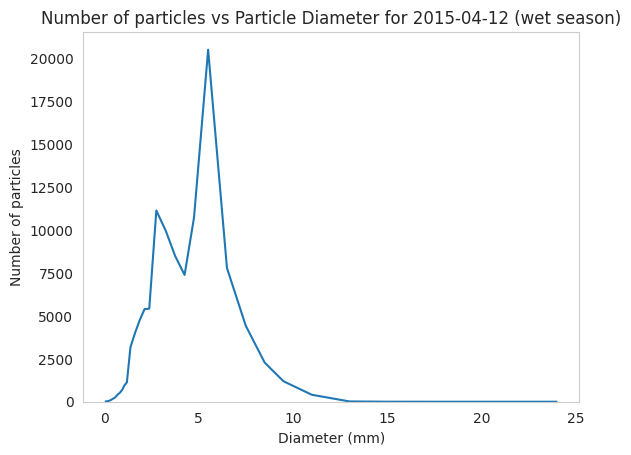

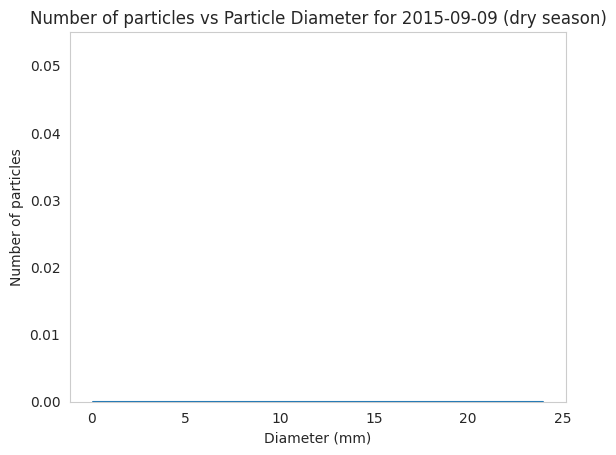

In [20]:
files = ['/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/pereiraa1/246626-laser-disdrometer/maoldS10.b1.20150412.000000.custom.cdf',
         '/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/pereiraa1/246626-laser-disdrometer/maoldS10.b1.20150909.000000.custom.cdf']
for file in files:
    if "20150412" in file or "20150411" in file:
        date = "2015-04-12"
        season = "wet"
    else:
        date = "2015-09-09"
        season = "dry"
    dt = xa.open_dataset(file)
    raw_spectrum_resampled = dt['raw_spectrum'].resample(time='1D').sum()
    values = xa.zeros_like(raw_spectrum_resampled).isel(raw_fall_velocity=0).drop(['raw_fall_velocity', 'time'])
    for raw_fall in raw_spectrum_resampled.raw_fall_velocity.values:
        values += raw_spectrum_resampled.sel(raw_fall_velocity=raw_fall)


    number_of_particles = values.isel(time=0).values
    size = values.particle_size

    fig, ax1 = plt.subplots()
    ax1.set_ylabel('Number of particles')
    ax1.set_xlabel('Diameter (mm)')
    ax1.plot(size, number_of_particles)
    ax1.grid()

    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    plt.title(f"Number of particles vs Particle Diameter for {date} ({season} season)")
    plt.show()



## Dm x RR e Dm x LWC

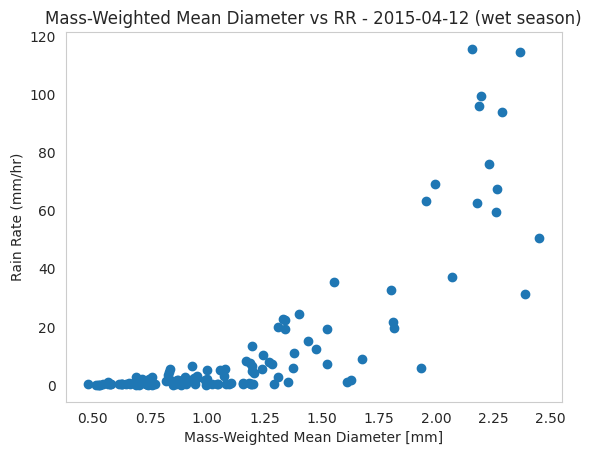

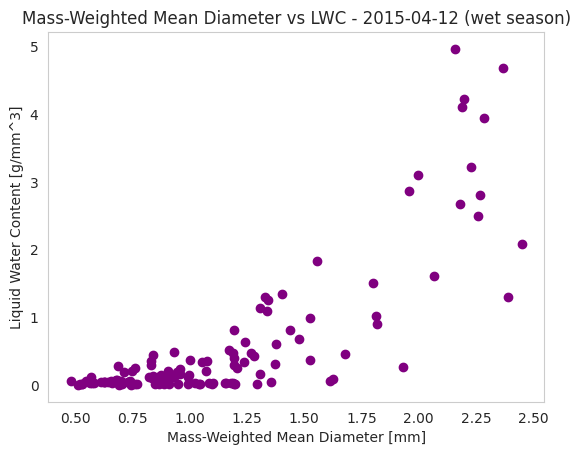

ValueError: array of sample points is empty

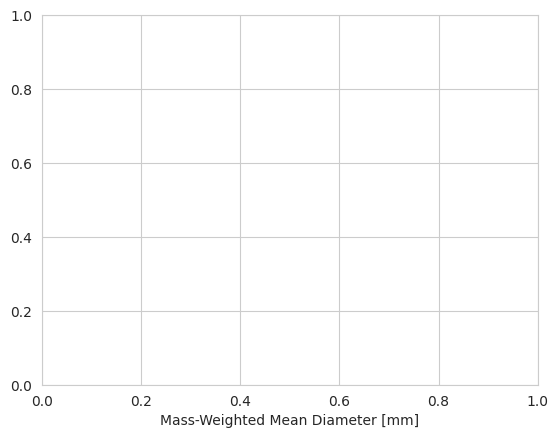

In [25]:
files = ["/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/pereiraa1/246831-ldquants/maoldquantsS10.c1.20150412.000000.custom.nc",
         "/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/pereiraa1/246831-ldquants/maoldquantsS10.c1.20150909.000000.custom.nc"]
for file in files:
    if "20150412" in file or "20150411" in file:
        date = "2015-04-12"
        season = "wet"
    else:
        date = "2015-09-09"
        season = "dry"
    dt = xa.open_dataset(file)
    dn = dt['mass_weighted_mean_diameter']
    rr = dt['rain_rate']
    lwc = dt['lwc']
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Mass-Weighted Mean Diameter [mm]')
    ax1.plot(dn, rr, 'o')
    ax1.set_ylabel('Rain Rate (mm/hr)')
    ax1.grid()

    plt.title(f"Mass-Weighted Mean Diameter vs RR - {date} ({season} season)")
    plt.show()

    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Mass-Weighted Mean Diameter [mm]')
    ax1.plot(dn, lwc, 'o', color='purple')
    ax1.set_ylabel('Liquid Water Content [g/mm^3]')
    ax1.grid()

    plt.title(f"Mass-Weighted Mean Diameter vs LWC - {date} ({season} season)")
    plt.show()

## CNN

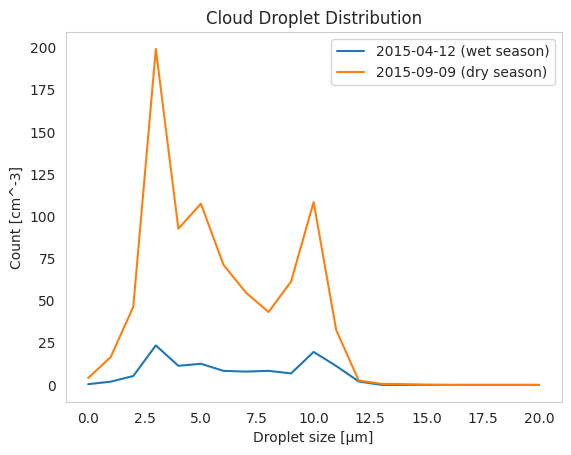

In [24]:
files = ["/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/pereiraa1/246831-cnn/maoaosccn100M1.a1.20150412.000000.custom.nc",
         "/content/drive/MyDrive/Colab Notebooks/Termodinâmica - Lista 02/pereiraa1/246831-cnn/maoaosccn100M1.a1.20150909.000000.custom.nc"]

fig, ax = plt.subplots()
for file in files:
    if "20150412" in file:
        date = "2015-04-12"
        season = "wet"
    else:
        date = "2015-09-09"
        season = "dry"
    dt = xa.open_dataset(file)
    cnn = dt['N_CCN_dN'].resample(time='1D').mean()
    droplet_size = cnn['size_bin'].values

    ax.plot(droplet_size, cnn.isel(time=0).values, label=f"{date} ({season} season)")

ax.set_ylabel('Count [cm^-3]')
ax.set_xlabel('Droplet size [µm]')
ax.grid()
plt.title("Cloud Droplet Distribution")
plt.legend()
plt.show()